# NLP Project - Twitter_Sentiment_Analysis

**Discription**

This Project is build by using concepts of Natural Language Processing field of Machine Learning to identify hate speech in tweets from tweeter social news app.

**Data Details**

given a training sample of tweets and labels, where 
- label '1' denotes the tweet is racist/sexist 
- label '0' denotes the tweet is not racist/sexist

 project objective is to predict the labels on the test dataset.

# Importing necessary libraries and Data sets

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,SimpleRNN, LSTM, GRU,Bidirectional,Dropout

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

In [6]:
df_train = pd.read_csv("/content/drive/MyDrive/Ml\AI/NLP_Itvedant/train.csv")
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Word cloud

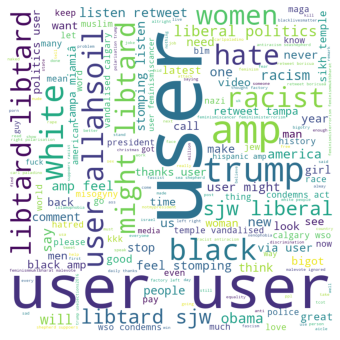

In [7]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df_train[df_train["label"]==1]["tweet"]))

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

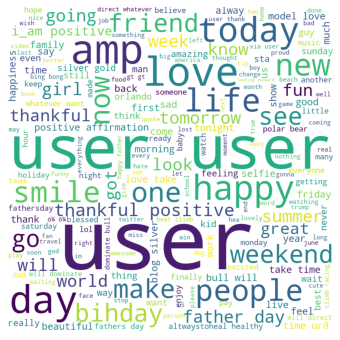

In [8]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df_train[df_train["label"]==0]["tweet"]))

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

# Class Distribution

In [9]:
df_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

### As we See train data is imbalanced around 7 % data associated with positive data and remains are negative data

Text(0.5, 1.0, 'Class Distribution')

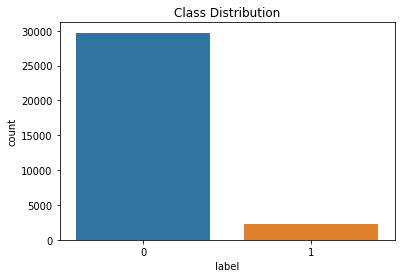

In [10]:
sns.countplot(df_train['label'])
plt.title('Class Distribution')

### As train data is imbalanced, we will do under sampling on our data,It is a technique to overcome the imbalancing of the dataset basically by  reducing the text data in more biased class equal to less biased class.

# EDA


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [12]:
df_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [13]:
# data cleaning
def clean_text(text):
    stop = stopwords.words('english') #stopwords list
    punc = list(punctuation) #punctuation list
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text) # tokenization
    word_tokens = [t for t in tokens if t.isalpha()] # removing numbers 
    # lemmatization,  stopwords & punctuation removal, to lower case
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [14]:
df_train["tweet"] =df_train["tweet"].apply(clean_text)

In [15]:
df_train["tweet"].head()

0    user father dysfunctional selfish drag kid dys...
1    user user thanks lyft credit ca use cause offe...
2                                       bihday majesty
3                             model love u take u time
4                        factsguide society motivation
Name: tweet, dtype: object

In [16]:
x = df_train["tweet"].values
y = df_train["label"].values

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

## Data Balancing using under_sampling





In [18]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
x_train_bal, y_train_bal = rus.fit_resample(x_train.reshape(-1, 1), y_train)
pd.Series(y_train_bal).value_counts()

0    1809
1    1809
dtype: int64

In [20]:
x_train_bal

array([['wonderful dinner dinner yum thegafford stua adventure delicious'],
       ['user want make fill u follow link amp send u dm turnthatfrownupsidedown'],
       ['user emraan hashmi alisa khan found sleeping street delhi actress'],
       ...,
       ['user giant version flag rebellion sedition flapping virginia'],
       ['scapelliti woobietuesday blocked troll promise blacklivesmatter amp'],
       ['come user amp documented liar lost base calling nazi brownshi']],
      dtype=object)

In [21]:
sent_len=[]
for sent in df_train["tweet"]:
    sent_len.append(len(word_tokenize(sent)))
df_train['sent_len'] = sent_len
df_train.head()    

,id,label,tweet,sent_len
0,1,0,user father dysfunctional selfish drag kid dys...,8
1,2,0,user user thanks lyft credit ca use cause offe...,14
2,3,0,bihday majesty,2
3,4,0,model love u take u time,6
4,5,0,factsguide society motivation,3


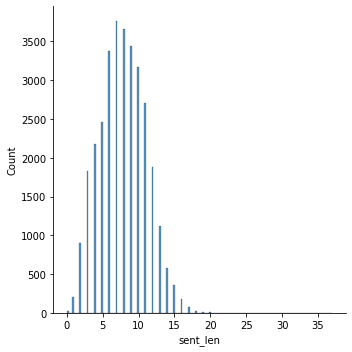

In [22]:
sns.displot(df_train['sent_len'])

In [23]:
max(sent_len)

37

In [24]:
np.quantile(sent_len,0.95)

13.0

In [25]:
max_len = 13

## Keras Tokenizer

In [32]:
# Tokenization
tok = Tokenizer(char_level=False,split=' ')
x_train_bal=x_train_bal.flatten()
tok.fit_on_texts(x_train_bal)

In [33]:
tok.index_word

{1: 'user',
 2: 'amp',
 3: 'trump',
 4: 'love',
 5: 'like',
 6: 'u',
 7: 'day',
 8: 'white',
 9: 'black',
 10: 'new',
 11: 'libtard',
 12: 'people',
 13: 'woman',
 14: 'happy',
 15: 'one',
 16: 'time',
 17: 'racist',
 18: 'good',
 19: 'get',
 20: 'politics',
 21: 'make',
 22: 'life',
 23: 'go',
 24: 'today',
 25: 'feel',
 26: 'liberal',
 27: 'say',
 28: 'girl',
 29: 'might',
 30: 'allahsoil',
 31: 'want',
 32: 'see',
 33: 'hate',
 34: 'thankful',
 35: 'sjw',
 36: 'positive',
 37: 'video',
 38: 'bihday',
 39: 'way',
 40: 'smile',
 41: 'world',
 42: 'obama',
 43: 'ca',
 44: 'got',
 45: 'need',
 46: 'retweet',
 47: 'look',
 48: 'year',
 49: 'take',
 50: 'think',
 51: 'stop',
 52: 'listen',
 53: 'great',
 54: 'never',
 55: 'friend',
 56: 'america',
 57: 'racism',
 58: 'father',
 59: 'family',
 60: 'via',
 61: 'work',
 62: 'thing',
 63: 'best',
 64: 'would',
 65: 'bull',
 66: 'call',
 67: 'come',
 68: 'back',
 69: 'really',
 70: 'right',
 71: 'man',
 72: 'know',
 73: 'men',
 74: 'summer',
 

In [34]:
vocab_len = len(tok.index_word)
vocab_len

7990

In [36]:
sequences_train = tok.texts_to_sequences(x_train_bal)

In [37]:
sequences_train

[[488, 666, 666, 1443, 3141, 3142, 914, 3143],
 [1, 31, 21, 1444, 6, 138, 1992, 2, 667, 6, 1445, 3144],
 [1, 3145, 3146, 3147, 1993, 151, 3148, 668, 3149, 1446],
 [1, 1994, 76, 86, 1, 3150],
 [14, 58, 111, 111, 669, 669, 59],
 [3151, 1447, 158, 3152, 3153],
 [122, 63, 122, 55],
 [360, 31, 41, 5, 3154, 3155, 489, 3156, 131, 1448],
 [1449, 177, 1450, 1451, 277, 88, 193, 159, 915, 4],
 [79, 23, 178, 1452, 1995, 3157, 32, 1, 432, 123, 32, 254, 490, 3158, 3159],
 [766, 18, 766, 1121, 1122, 179, 361, 1123, 3160],
 [916, 1453, 1996, 3161, 1124, 4, 3162, 3163, 388],
 [151, 670, 917, 1125, 1454, 54, 433, 204, 32, 16],
 [91, 3164, 1126, 193, 277, 88],
 [555, 1127, 1997, 255, 3165, 434, 1127, 4],
 [767, 152, 43, 671],
 [1128, 918, 180, 1455, 1998, 74, 1129, 3166],
 [1999, 278, 1999, 278, 2000, 55, 18, 16, 172, 219],
 [1, 6, 672, 132, 3167, 673, 3168, 768],
 [68, 389, 41, 1130, 1, 2001, 3169],
 [556, 3170, 3171, 556, 255, 22, 3172, 3173],
 [160, 3174, 674, 3175, 1131, 160, 37, 3176, 1456, 3177, 14

In [38]:
sequences_matrix_train = sequence.pad_sequences(sequences_train,maxlen=max_len)

In [39]:
sequences_matrix_train

array([[   0,    0,    0, ..., 3142,  914, 3143],
       [   0,    1,   31, ...,    6, 1445, 3144],
       [   0,    0,    0, ...,  668, 3149, 1446],
       ...,
       [   0,    0,    0, ..., 3131, 3132, 1978],
       [   0,    0,    0, ..., 7988,  322,    2],
       [   0,    0,    0, ...,  547,  276, 7990]], dtype=int32)

In [40]:
# First document
sequences_matrix_train[0]

array([   0,    0,    0,    0,    0,  488,  666,  666, 1443, 3141, 3142,
        914, 3143], dtype=int32)

# Artificial Neural Network

## Using GRU architechure

In [41]:
model = Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model.add(GRU(16,activation='tanh'))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
# output layer
model.add(Dense(1,activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 13, 500)           3995500   
_________________________________________________________________
gru (GRU)                    (None, 16)                24864     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 4,020,653
Trainable params: 4,020,653
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [47]:
model.fit(sequences_matrix_train,y_train_bal,batch_size=100,epochs=50)

Epoch 1/50
37/37 [==============================] - 7s 70ms/step - loss: 0.6583
Epoch 2/50
37/37 [==============================] - 3s 69ms/step - loss: 0.3821
Epoch 3/50
37/37 [==============================] - 2s 67ms/step - loss: 0.1213
Epoch 4/50
37/37 [==============================] - 3s 68ms/step - loss: 0.0435
Epoch 5/50
37/37 [==============================] - 3s 68ms/step - loss: 0.0192
Epoch 6/50
37/37 [==============================] - 3s 68ms/step - loss: 0.0153
Epoch 7/50
37/37 [==============================] - 3s 70ms/step - loss: 0.0093
Epoch 8/50
37/37 [==============================] - 3s 69ms/step - loss: 0.0072
Epoch 9/50
37/37 [==============================] - 2s 67ms/step - loss: 0.0060
Epoch 10/50
37/37 [==============================] - 3s 69ms/step - loss: 0.0049
Epoch 11/50
37/37 [==============================] - 3s 68ms/step - loss: 0.0041
Epoch 12/50
37/37 [==============================] - 2s 67ms/step - loss: 0.0042
Epoch 13/50
37/37 [==================

In [48]:
sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [49]:
sequences_matrix_test

array([[   0,    0,    0, ...,   68,  133, 1669],
       [   0,    0,    0, ..., 4645, 4645, 2522],
       [   0,    0,    0, ...,  621,   38, 2534],
       ...,
       [   0,    0,    0, ...,  519,  721,  706],
       [   0,    0,    0, ...,    5,    2, 1007],
       [   0,    0,    0, ...,  161,  152,  138]], dtype=int32)

## Prediction and Evaluation

In [50]:
y_pred=model.predict(sequences_matrix_test)

In [51]:
y_pred = np.where(y_pred>=0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      5960
           1       0.27      0.82      0.40       433

    accuracy                           0.84      6393
   macro avg       0.63      0.83      0.65      6393
weighted avg       0.94      0.84      0.87      6393



# Machine Learning Model

## Vectorization

In [58]:
# CountVectorizer
cv = CountVectorizer()
x_train_cv = cv.fit_transform(x_train_bal)
x_test_cv = cv.transform(x_test)

In [59]:
x_test_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
# TfidfVectorizer
tf = TfidfVectorizer()
x_train_tf = tf.fit_transform(x_train_bal)
x_test_tf = tf.transform(x_test)

In [61]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

## Logistic Regression

In [62]:
lr=LogisticRegression()
lr.fit(x_train_tf,y_train_bal)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction and Evaluation

In [63]:
ypred_lr=lr.predict(x_test_tf)

In [64]:
print(accuracy_score(ypred_lr,y_test))
print(confusion_matrix(ypred_lr,y_test))
print(classification_report(ypred_lr,y_test))

0.8531206006569686
[[5082   61]
 [ 878  372]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      5143
           1       0.86      0.30      0.44      1250

    accuracy                           0.85      6393
   macro avg       0.86      0.64      0.68      6393
weighted avg       0.85      0.85      0.82      6393



## Support Vector Classifier

In [65]:
from sklearn.svm import SVC

In [67]:
svc=SVC()
svc.fit(x_train_tf,y_train_bal)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
ypred_svc=svc.predict(x_test_tf)

In [69]:
print(accuracy_score(ypred_svc,y_test))
print(confusion_matrix(ypred_svc,y_test))
print(classification_report(ypred_svc,y_test))

0.8676677616142656
[[5176   62]
 [ 784  371]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      5238
           1       0.86      0.32      0.47      1155

    accuracy                           0.87      6393
   macro avg       0.86      0.65      0.70      6393
weighted avg       0.87      0.87      0.84      6393



## Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt= DecisionTreeClassifier()
dt.fit(x_train_tf,y_train_bal)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction and Evaluation

In [73]:
ypred_dt=dt.predict(x_test_tf)

In [74]:
print(accuracy_score(ypred_dt,y_test))
print(confusion_matrix(ypred_dt,y_test))
print(classification_report(ypred_dt,y_test))

0.7289222587204756
[[4300   73]
 [1660  360]]
              precision    recall  f1-score   support

           0       0.72      0.98      0.83      4373
           1       0.83      0.18      0.29      2020

    accuracy                           0.73      6393
   macro avg       0.78      0.58      0.56      6393
weighted avg       0.76      0.73      0.66      6393



# Prediction on testing Data

In [75]:
df_test = pd.read_csv("/content/drive/MyDrive/Ml\AI/NLP_Itvedant/test.csv")
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [76]:
df_test.shape

(17197, 2)

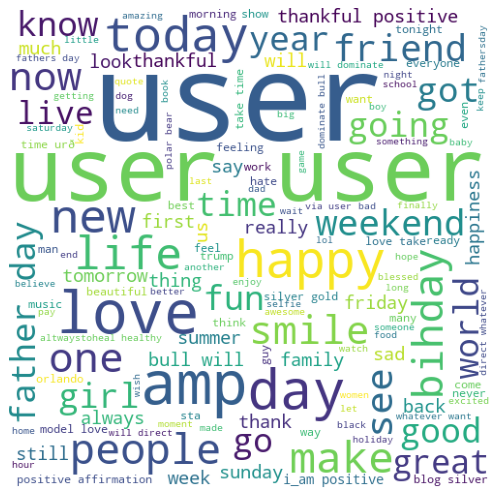

In [77]:
# WordCloud
wc = WordCloud(width = 500, 
               height = 500, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df_test["tweet"]))

plt.figure(figsize = (8,8),dpi=80) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [78]:
y=df_test['tweet']
y

0        #studiolife #aislife #requires #passion #dedic...
1         @user #white #supremacists want everyone to s...
2        safe ways to heal your #acne!!    #altwaystohe...
3        is the hp and the cursed child book up for res...
4          3rd #bihday to my amazing, hilarious #nephew...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 17197, dtype: object

In [79]:
lbl=[]

In [80]:
# lbl=[]
# def predict_tweet(tweet):
#   tweet=clean_text(tweet)
#   tweet_cv = cv.transform([tweet])
#   prediction = lr.predict(tweet_cv)
#   lbl.append(prediction)
#   return prediction[0]

In [81]:
def predict_tweet(tweet):
    tweet_cv = cv.transform([tweet])
    prediction = lr.predict(tweet_cv)
    lbl.append(prediction[0])
    return prediction[0]

In [82]:
for i in y:
  predict_tweet(i)

In [83]:
lbl

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,


In [84]:
len(lbl)

17197

In [85]:
df_test['lebel']=lbl

In [86]:
df_test.head()

,id,tweet,lebel
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,1
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,1
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0


# Data Augmentation Technique - Handling Data Imbalance

In [87]:
pip install nlpaug

In [88]:
import nlpaug.augmenter.word as naw

In [89]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [94]:
df_aug = df_train.copy()

aug_texts = []
df_balalnced = df_aug[df_aug['label'] == 1]
aug = naw.SynonymAug(aug_src='wordnet')

texts = df_balalnced['tweet'].tolist()

for text in texts:
  augmented_texts = aug.augment(text, n=12)
  
  for augmented in augmented_texts:
    aug_texts.append(augmented)

print(len(aug_texts))

temp = pd.DataFrame({'tweet': aug_texts})
print(temp)
        
temp['label'] = 1
        
df_aug = pd.concat([df_aug, temp], axis=0)
df_aug = df_aug.reset_index()
df_aug = df_aug.drop(columns=['index'])
del temp, df_balalnced

26868
                                                   tweet
0      drug user cnn call michigan middle shoal wall ...
1      user cnn call michigan middle schooltime wall ...
2      exploiter cnn call michigan middle school bulw...
3      user cnn cry michigan middle school wall chant...
4      user cnn call michigan middle school day rampa...
...                                                  ...
26863  drug user sikh temple vandalised calgary wso c...
26864  user sikh temple vandalise calgary wso condemn...
26865  user sikh temple vandalised calgary wso condem...
26866  user sikh temple vandalise calgary wso condemn...
26867  user sikh synagogue vandalised calgary wso con...

[26868 rows x 1 columns]


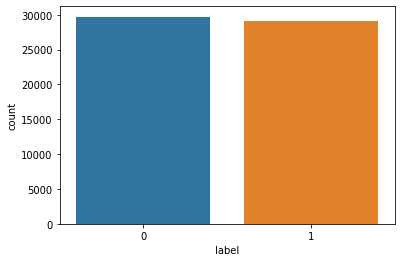

In [95]:
sns.countplot(data=df_aug, x='label')

In [96]:
df_aug.head()

,id,label,tweet,sent_len
0,1.0,0,user father dysfunctional selfish drag kid dys...,8.0
1,2.0,0,user user thanks lyft credit ca use cause offe...,14.0
2,3.0,0,bihday majesty,2.0
3,4.0,0,model love u take u time,6.0
4,5.0,0,factsguide society motivation,3.0


## Training and Testing Data

In [97]:
x = df_aug["tweet"].values
y = df_aug["label"].values

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [99]:
max(sent_len)

37

In [100]:
np.quantile(sent_len,0.95)

13.0

In [101]:
max_len = 13

## Tokenization

In [102]:
# Tokenization
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(x_train)

In [103]:
tok.index_word

{1: 'user',
 2: 'amp',
 3: 'love',
 4: 'day',
 5: 'u',
 6: 'trump',
 7: 'like',
 8: 'libtard',
 9: 'happy',
 10: 'white',
 11: 'people',
 12: 'new',
 13: 'get',
 14: 'black',
 15: 'time',
 16: 'woman',
 17: 'life',
 18: 'one',
 19: 'today',
 20: 'make',
 21: 'allahsoil',
 22: 'good',
 23: 'racist',
 24: 'go',
 25: 'ca',
 26: 'girl',
 27: 'want',
 28: 'see',
 29: 'politics',
 30: 'need',
 31: 'feel',
 32: 'father',
 33: 'sjw',
 34: 'might',
 35: 'positive',
 36: 'liberal',
 37: 'obama',
 38: 'take',
 39: 'thankful',
 40: 'say',
 41: 'hate',
 42: 'year',
 43: 'bihday',
 44: 'substance',
 45: 'retweet',
 46: 'abuser',
 47: 'smile',
 48: 'drug',
 49: 'think',
 50: 'work',
 51: 'great',
 52: 'would',
 53: 'friend',
 54: 'look',
 55: 'via',
 56: 'exploiter',
 57: 'listen',
 58: 'got',
 59: 'way',
 60: 'video',
 61: 'america',
 62: 'world',
 63: 'right',
 64: 'back',
 65: 'thanks',
 66: 'never',
 67: 'family',
 68: 'know',
 69: 'really',
 70: 'come',
 71: 'stop',
 72: 'thing',
 73: 'man',
 74

In [104]:
vocab_len = len(tok.index_word)
vocab_len

32022

In [105]:
sequences_train = tok.texts_to_sequences(x_train)

In [106]:
sequences_train

[[1, 19, 1021, 11046, 11047, 354, 4655, 9380, 315, 146, 51, 14849, 919],
 [1249, 125, 7632, 16, 73, 3439, 8372, 1908, 1529, 174, 186, 55, 1],
 [6694, 35, 122],
 [1, 263, 6255, 1355, 1815, 6, 316, 3939, 88, 2632, 346],
 [1, 1, 123, 45, 548, 516, 30, 1975, 3940, 3941],
 [267, 4656, 1976, 224, 770, 3942, 725, 11048, 5185, 734, 726, 5186],
 [2892, 9381, 12, 1, 14850, 9382, 8373],
 [180, 202, 1490, 6256, 534, 1250, 421, 473, 1530, 346],
 [14851, 89, 4657, 25, 411, 1, 318, 177, 229, 111, 292, 14852, 94],
 [217, 31, 7, 1773, 57, 45],
 [108, 373, 125, 189, 17, 65, 78, 295, 47],
 [3013, 5187, 1696, 22, 2153, 285],
 [11049, 4209, 2337, 38, 3745, 240, 184, 543, 128, 41],
 [1,
  6,
  735,
  41,
  2515,
  849,
  252,
  10,
  86,
  6,
  1088,
  574,
  112,
  185,
  5188,
  67,
  1909,
  320],
 [14, 895, 11050, 2750, 2516, 386, 14853, 158, 2420, 862],
 [58, 1089, 40, 1611, 84, 72, 210, 1611, 655],
 [1270, 11051],
 [442, 72, 16, 167, 4658, 4659],
 [2214, 7633, 179, 1152, 413, 2038, 14854],
 [2893, 92,

In [107]:
sequences_matrix_train = sequence.pad_sequences(sequences_train,maxlen=max_len)

In [108]:
sequences_matrix_train

array([[    1,    19,  1021, ...,    51, 14849,   919],
       [ 1249,   125,  7632, ...,   186,    55,     1],
       [    0,     0,     0, ...,  6694,    35,   122],
       ...,
       [    0,     0,     0, ...,   676,  9659, 32018],
       [    0,     0,     0, ..., 12778, 13566, 32021],
       [    0,  5476,  5577, ...,   582,  5622,   462]], dtype=int32)

## RNN Network

In [109]:
model = Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model.add(SimpleRNN(16,activation='tanh'))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
# output layer
model.add(Dense(1,activation='sigmoid'))

In [110]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 13, 500)           16011500  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                8272      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 16,020,061
Trainable params: 16,020,061
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [113]:
model.fit(sequences_matrix_train,y_train,batch_size=100,epochs=25)

Epoch 1/25
471/471 [==============================] - 93s 197ms/step - loss: 0.0410
Epoch 2/25
471/471 [==============================] - 93s 197ms/step - loss: 0.0103
Epoch 3/25
471/471 [==============================] - 93s 197ms/step - loss: 0.0051
Epoch 4/25
471/471 [==============================] - 93s 197ms/step - loss: 0.0034
Epoch 5/25
471/471 [==============================] - 93s 197ms/step - loss: 0.0038
Epoch 6/25
471/471 [==============================] - 93s 197ms/step - loss: 0.0041
Epoch 7/25
471/471 [==============================] - 93s 198ms/step - loss: 0.0043
Epoch 8/25
471/471 [==============================] - 93s 197ms/step - loss: 0.0021
Epoch 9/25
471/471 [==============================] - 93s 198ms/step - loss: 0.0016
Epoch 10/25
471/471 [==============================] - 93s 197ms/step - loss: 0.0015
Epoch 11/25
471/471 [==============================] - 93s 198ms/step - loss: 0.0031
Epoch 12/25
471/471 [==============================] - 93s 198ms/step - lo

In [115]:
sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [116]:
sequences_matrix_test

array([[   0,    0,    0, ...,  734,  347,  150],
       [   0, 2226,   94, ...,   94, 5821, 2796],
       [   0,    0,    0, ...,  560,   16, 1998],
       ...,
       [   0,    0,    0, ...,  681,    8,  531],
       [   0,    0,    0, ..., 2551,   35,  122],
       [   0,    0,    0, ..., 1446, 5556, 1748]], dtype=int32)

## NN Model Prediction and Evaluation

In [117]:
y_pred=model.predict(sequences_matrix_test)

In [118]:
y_pred = np.where(y_pred>=0.5,1,0)
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      6041
           1       0.96      0.99      0.98      5725

    accuracy                           0.98     11766
   macro avg       0.98      0.98      0.98     11766
weighted avg       0.98      0.98      0.98     11766

